<a href="https://colab.research.google.com/github/dmane121/dm121/blob/main/Stock_price__prediction_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction Using Linear Regression

In [ ]:
#importing required libaries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/hdfc.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##to show first five rcords
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-21,1250.000000,1250.000000,1238.400024,1244.349976,1224.747559,7492402
1,2020-01-22,1248.050049,1255.000000,1234.400024,1240.849976,1221.302612,9184155
2,2020-01-23,1240.000000,1246.849976,1231.000000,1244.849976,1225.239624,5754460
3,2020-01-24,1246.000000,1254.000000,1239.099976,1244.550049,1224.944458,5915878
4,2020-01-27,1235.000000,1235.000000,1211.750000,1213.199951,1194.088257,9444276


In [ ]:

# to show all details of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       748 non-null    object 
 1   Open       748 non-null    float64
 2   High       748 non-null    float64
 3   Low        748 non-null    float64
 4   Close      748 non-null    float64
 5   Adj Close  748 non-null    float64
 6   Volume     748 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.0+ KB


In [ ]:
#convert date column to datetime
data["Date"]=pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       748 non-null    datetime64[ns]
 1   Open       748 non-null    float64       
 2   High       748 non-null    float64       
 3   Low        748 non-null    float64       
 4   Close      748 non-null    float64       
 5   Adj Close  748 non-null    float64       
 6   Volume     748 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.0 KB


In [ ]:
#to show no of records and columns
data.shape

(748, 7)

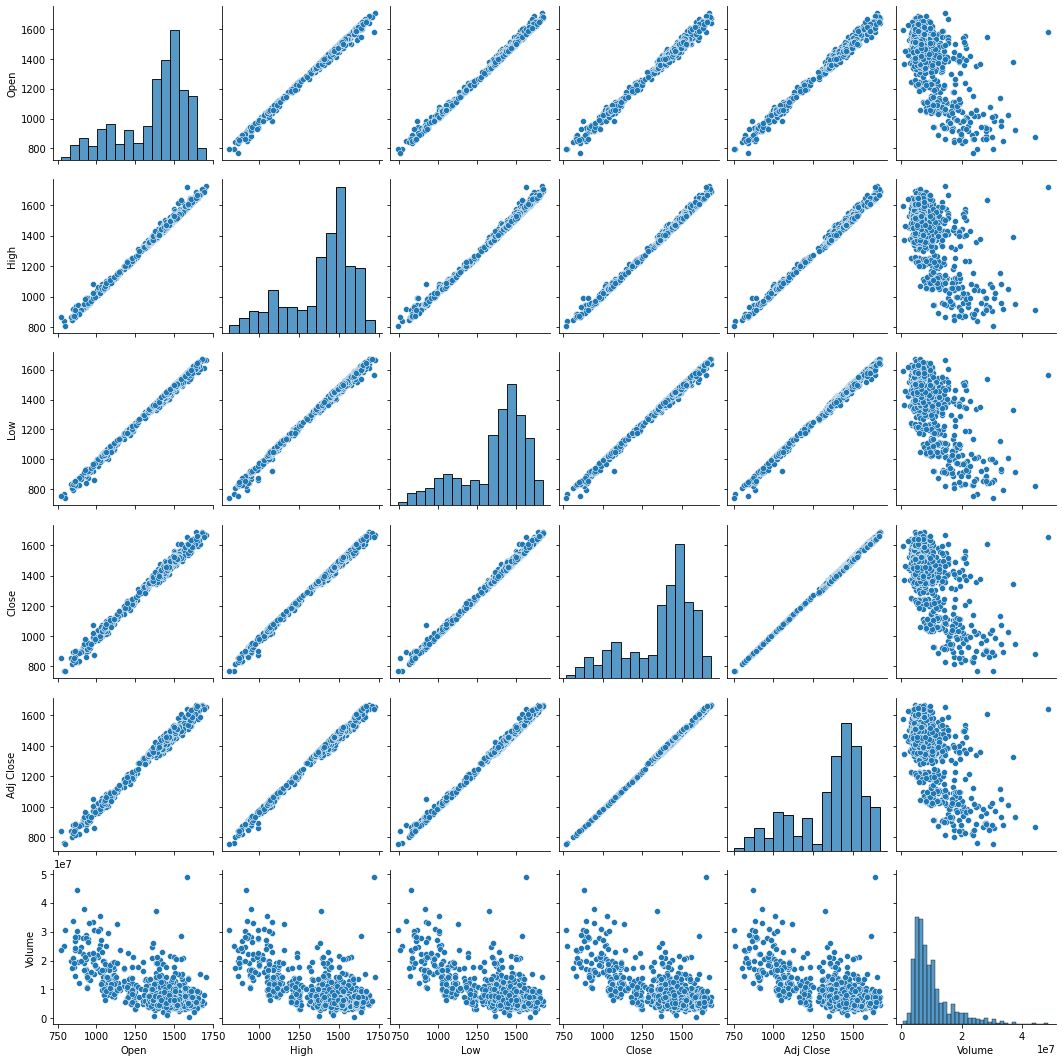

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
# to check null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

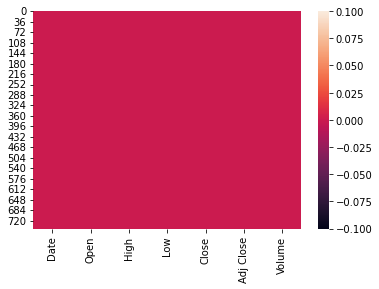

In [ ]:
# visulize of null values
sns.heatmap(data.isnull())
plt.show()

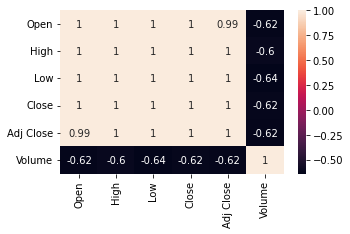

In [ ]:
#check relation of input and Output with the help of correlation
plt.figure(figsize=(5,3))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,748.000000,748.000000,748.000000,748.000000,748.000000,7.480000e+02
mean,1372.853476,1387.640774,1356.935764,1372.625069,1358.310445,9.919544e+06
std,208.396177,207.580002,210.844982,209.413319,210.356305,6.405839e+06
min,770.450012,810.000000,738.750000,767.700012,755.606262,5.484040e+05
25%,1243.137451,1248.637451,1229.325012,1240.787476,1221.241089,5.616006e+06
50%,1438.000000,1449.700012,1421.350036,1436.650024,1421.856079,7.873770e+06
75%,1513.962463,1528.850037,1500.324982,1515.774994,1502.288055,1.175020e+07
max,1705.000000,1725.000000,1671.000000,1688.699951,1669.291016,4.872548e+07


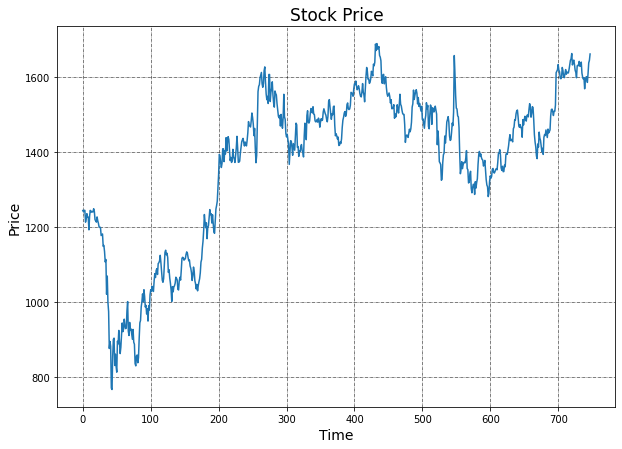

In [ ]:
#visulaize stock price

data['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
#Here we have to calculate contineos numeric values so we will use linear regression 

In [ ]:
#Separate the Input and Output Columns
X = data[['High','Low','Open','Volume']].values
Y = data['Close'].values

In [ ]:
X

array([[1.25000000e+03, 1.23840002e+03, 1.25000000e+03, 7.49240200e+06],
       [1.25500000e+03, 1.23440002e+03, 1.24805005e+03, 9.18415500e+06],
       [1.24684998e+03, 1.23100000e+03, 1.24000000e+03, 5.75446000e+06],
       ...,
       [1.64159998e+03, 1.59969995e+03, 1.60500000e+03, 9.54532100e+06],
       [1.65000000e+03, 1.63300000e+03, 1.63700000e+03, 5.58608100e+06],
       [1.66900000e+03, 1.64340002e+03, 1.64409998e+03, 9.42170200e+06]])

In [ ]:
Y

array([1244.349976, 1240.849976, 1244.849976, 1244.550049, 1213.199951,
       1223.199951, 1235.849976, 1226.050049, 1226.300049, 1192.800049,
       1229.800049, 1244.650024, 1239.800049, 1242.199951, 1240.300049,
       1240.599976, 1249.      , 1241.400024, 1219.349976, 1217.150024,
       1213.25    , 1227.199951, 1217.099976, 1209.949951, 1200.300049,
       1199.25    , 1199.449951, 1177.650024, 1179.599976, 1181.800049,
       1148.849976, 1151.349976, 1134.900024, 1107.300049, 1113.800049,
       1021.299988, 1069.800049,  999.5     ,  975.099976,  876.900024,
        895.549988,  882.849976,  771.549988,  767.700012,  856.75    ,
        901.099976,  904.450012,  831.650024,  861.900024,  829.650024,
        813.849976,  896.099976,  888.900024,  925.049988,  895.349976,
        863.299988,  879.75    ,  910.299988,  944.849976,  921.650024,
        928.599976,  954.950012,  938.049988,  929.700012,  931.400024,
        977.099976, 1001.799988,  923.      ,  911.450012,  946.

In [ ]:
#divide the dataset into 70% and 30% fro trainnig and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape

(523, 4)

In [ ]:
X_test.shape

(225, 4)

In [ ]:
Y_train.shape

(523,)

In [ ]:
Y_test.shape

(225,)

In [ ]:
#we train model with the help of LinearRegression class with 70% data 
# call LinearRegression inbuilt class
from sklearn.linear_model import LinearRegression

In [ ]:
# crate object of class LinearRegressionl 
lr=LinearRegression() # lr user defined object of LinearRegression()

In [ ]:
# we train the model use fit() with 70%
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# check coefficient(m or slope or gradient) and intercept(b)
lr.coef_ # coef_ inbuilt method of linear regression class

array([ 8.77970595e-01,  7.62386862e-01, -6.47695363e-01, -2.58416157e-07])

In [ ]:
print(lr.intercept_)

11.565908400877788


### Prediction

In [ ]:

#we test the error with 30% data
Y_pred= lr.predict(X_test)


In [ ]:
print(Y_pred)

[1580.49528419 1520.56440344 1409.83941275 1627.28440478 1037.03320513
 1493.46719026 1429.44574018  936.7879577  1573.24755534  935.77828092
 1400.08434733 1518.7171781  1402.85760692 1238.85969276 1225.24570989
 1503.1672277  1394.52756331 1457.69907429  922.14956189 1358.40240615
 1293.78678913  920.43263756 1486.95319318 1593.9790876  1626.73742381
 1483.81937226  846.53642817 1638.11573991 1366.48903323 1596.46223612
 1508.29744517 1207.60827134 1649.49646502 1500.9128013  1492.59911412
 1443.59211632 1417.65996599 1440.21443348 1239.65614334 1029.27258951
 1033.32719004 1467.79206556 1229.57177661 1441.70565695 1058.85525383
  936.4962106  1639.04163076 1434.06419748 1316.05011527 1481.98098036
 1464.44163604 1364.06076013 1382.45190362 1612.5955933  1467.69312893
  854.79614641 1455.95319718 1335.61972492 1394.09301804 1521.29260911
 1121.75609115  879.15316639 1352.44022943 1359.56191472 1314.41264558
 1400.55763501 1207.77291532 1208.38244926 1553.44310287 1448.04935783
 1455.

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
#check trainning score
lr.score(X_train,Y_train)

0.998491969491141

In [ ]:
#check testing score:use score() inbuilt method 
lr.score(X_test,Y_pred)

1.0

In [ ]:
#Evaluation of model with the help of r2_score()
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9987728866239453

In [ ]:
#here testing score is more than trainning score so no need to apply regularization

In [ ]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error: 5.880221551557885
Mean Squared Error: 58.08957038124245
Root Mean Squared Error: 7.621651420869525


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


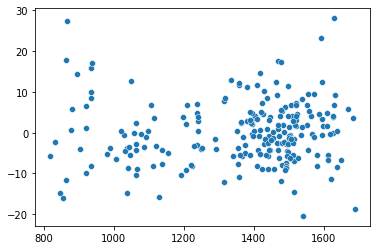

In [ ]:
#There should be Linear relationship between input & output
residuals=Y_test-Y_pred
sns.scatterplot(Y_pred,residuals)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


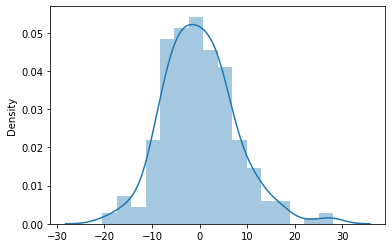

In [ ]:
#assumptions no.4 there should be normal distribution curve means bell shaped curve
sns.distplot(residuals)
plt.show()

In [ ]:
#give input file area.csv
ar=pd.read_csv("/content/drive/MyDrive/Datasets/HDFC1.csv")

In [ ]:
ar

,Open,High,Low,Close
0,1509.949951,1521.250000,1467.550049,1486.650024
1,1458.650024,1495.000000,1444.000000,1488.050049
2,1450.000000,1485.000000,1435.000000,1474.949951
3,1477.500000,1486.699951,1460.000000,1463.250000
4,1472.750000,1491.550049,1466.800049,1485.699951
...,...,...,...,...
243,1615.000000,1621.300049,1580.300049,1585.300049
244,1589.800049,1611.000000,1577.500000,1608.900024
245,1605.000000,1641.599976,1599.699951,1637.300049
246,1637.000000,1650.000000,1633.000000,1644.099976


In [ ]:
y_pred=lr.predict(ar)
print(y_pred)

[1546.51283314 1496.71360776 1487.32453407 1496.57236468 1491.69528934
 1538.17833279 1534.10682088 1550.42837182 1541.40494248 1551.57525794
 1499.32378847 1498.87662039 1538.84626422 1520.16166868 1511.24382829
 1515.92617226 1552.67600238 1527.53717395 1518.2122506  1530.35799028
 1516.25689407 1545.00646658 1497.61304744 1465.33188124 1444.4096061
 1417.75497407 1402.54143184 1396.36980878 1344.84261044 1335.06049589
 1373.10661323 1458.37411477 1415.26227201 1442.86593871 1469.61192195
 1461.04182064 1487.27377823 1501.92119128 1510.33727563 1538.13654469
 1489.96088307 1473.4068754  1456.35618582 1463.79220667 1492.58588779
 1485.51936206 1506.69896432 1699.60899585 1707.94121437 1615.35064436
 1559.47016964 1532.56228845 1517.82229855 1504.59020295 1517.72389818
 1448.41630355 1423.83813192 1372.6027122  1385.41067838 1380.31610501
 1385.3762356  1390.70191923 1378.59737929 1385.24685456 1406.08857777
 1397.4709013  1436.42183205 1394.93525578 1346.62890832 1325.14417042
 1345.8

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
ar= pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted' : Y_pred.flatten()})

In [ ]:
ar

,Actual,Predicted
0,1572.349976,1580.495284
1,1522.099976,1520.564403
2,1401.550049,1409.839413
3,1631.050049,1627.284405
4,1033.349976,1037.033205
...,...,...
220,1078.599976,1078.875163
221,1133.050049,1137.266641
222,1472.849976,1470.881964
223,829.650024,831.885981


In [ ]:
#plotting graph
graph = ar.head(20)

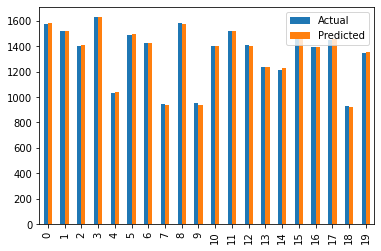

In [ ]:
graph.plot(kind='bar')
plt.show()

In [ ]:
#to write data from dataframe or into new file 
ar.to_csv("Stock_price_predicted.csv") #existing dataframe to csv